# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [2]:
#загружаем данные из файла
data = pd.read_csv("pr6_data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
display(data.head(3))

#проводим статистический анализ даных, а также смотрим пропуски в данных
display(data.info())
display(data.describe())

#Смотрим сколько было уникальных клиентов
display("Уникальных клиентов ", data['CustomerID'].nunique())

#Смотрим из каких стран совершались транзацкции
display("Уникальных стран ", data['Country'].nunique())
display(data['Country'].value_counts())

#Смотрим дубликаты
duplicates = data[data.duplicated()]
display(duplicates.info())




Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


None

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


'Уникальных клиентов '

4372

'Уникальных стран '

38

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 517 to 541701
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    5268 non-null   object 
 1   StockCode    5268 non-null   object 
 2   Description  5268 non-null   object 
 3   Quantity     5268 non-null   int64  
 4   InvoiceDate  5268 non-null   object 
 5   UnitPrice    5268 non-null   float64
 6   CustomerID   5225 non-null   object 
 7   Country      5268 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 370.4+ KB


None

In [3]:
#Преобразуем признак с датой в формат datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
#Смотрим самую ранюю и самую позднюю дату транзакции
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [4]:
#Удаляем пропуски
data = data.dropna(subset=['CustomerID'])
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


None

#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [5]:
#Удаляем дубликаты
data=data.drop_duplicates()
display(data.shape)

(401604, 8)

#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [6]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [7]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [8]:
#data.to_csv("pr6_test.csv", index=False)
#сохраним на диск датасет, чтобы в следующий раз не ждать вычислений


In [9]:
#загружаем с диска
#data=pd.read_csv("pr6_test.csv")

#смотрим сколько транзакций не имею контрагентов
#display(data['QuantityCanceled'].value_counts())
display(data['QuantityCanceled'].info())

#удаляем транзакции, которые не имеют контрагентов
data = data.dropna(subset=['QuantityCanceled'])
#display(data['QuantityCanceled'].value_counts())
display(data['QuantityCanceled'].info())

#Удаляем транзакции с отрицательным количеством товара
data=data.drop(data[data['Quantity'] < 0].index)
display(data.info())


<class 'pandas.core.series.Series'>
RangeIndex: 401604 entries, 0 to 401603
Series name: QuantityCanceled
Non-Null Count   Dtype  
--------------   -----  
400301 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


None

<class 'pandas.core.series.Series'>
Int64Index: 400301 entries, 0 to 401603
Series name: QuantityCanceled
Non-Null Count   Dtype  
--------------   -----  
400301 non-null  float64
dtypes: float64(1)
memory usage: 6.1 MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 401603
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         392732 non-null  object 
 1   StockCode         392732 non-null  object 
 2   Description       392732 non-null  object 
 3   Quantity          392732 non-null  int64  
 4   InvoiceDate       392732 non-null  object 
 5   UnitPrice         392732 non-null  float64
 6   CustomerID        392732 non-null  int64  
 7   Country           392732 non-null  object 
 8   QuantityCanceled  392732 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 30.0+ MB


None

#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [10]:
#Удаляем специальные операции
regex_pattern = r'^[a-zA-Z]+'
filter_condition = data['StockCode'].str.contains(regex_pattern)
data = data[~filter_condition]
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391183 entries, 0 to 401603
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         391183 non-null  object 
 1   StockCode         391183 non-null  object 
 2   Description       391183 non-null  object 
 3   Quantity          391183 non-null  int64  
 4   InvoiceDate       391183 non-null  object 
 5   UnitPrice         391183 non-null  float64
 6   CustomerID        391183 non-null  int64  
 7   Country           391183 non-null  object 
 8   QuantityCanceled  391183 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 29.8+ MB


None

#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [11]:
#Удаляем транзакции где нулевая цена у товаров
display((data['UnitPrice'] == 0).sum())
data=data.drop(data[data['UnitPrice']==0].index)
display(data.info())

33

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391150 entries, 0 to 401603
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         391150 non-null  object 
 1   StockCode         391150 non-null  object 
 2   Description       391150 non-null  object 
 3   Quantity          391150 non-null  int64  
 4   InvoiceDate       391150 non-null  object 
 5   UnitPrice         391150 non-null  float64
 6   CustomerID        391150 non-null  int64  
 7   Country           391150 non-null  object 
 8   QuantityCanceled  391150 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 29.8+ MB


None

#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [12]:
#Считаем общую цену заказа
data['TotalPrice']=data['UnitPrice']*(data['Quantity']-data['QuantityCanceled'])
display(data.head(2))


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34


Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



,Country,TotalPrice
35,United Kingdom,16579
14,Germany,443
13,France,379
10,EIRE,256
3,Belgium,98


,Country,TotalPrice
35,United Kingdom,6797691.44
23,Netherlands,283443.54
10,EIRE,247074.57
14,Germany,201520.71
13,France,181529.63


Тест Шапиро-Уилка:
Статистика теста: 0.842288613319397
p-value: 0.0
Распределение не является нормальным


<BarContainer object of 12 artists>

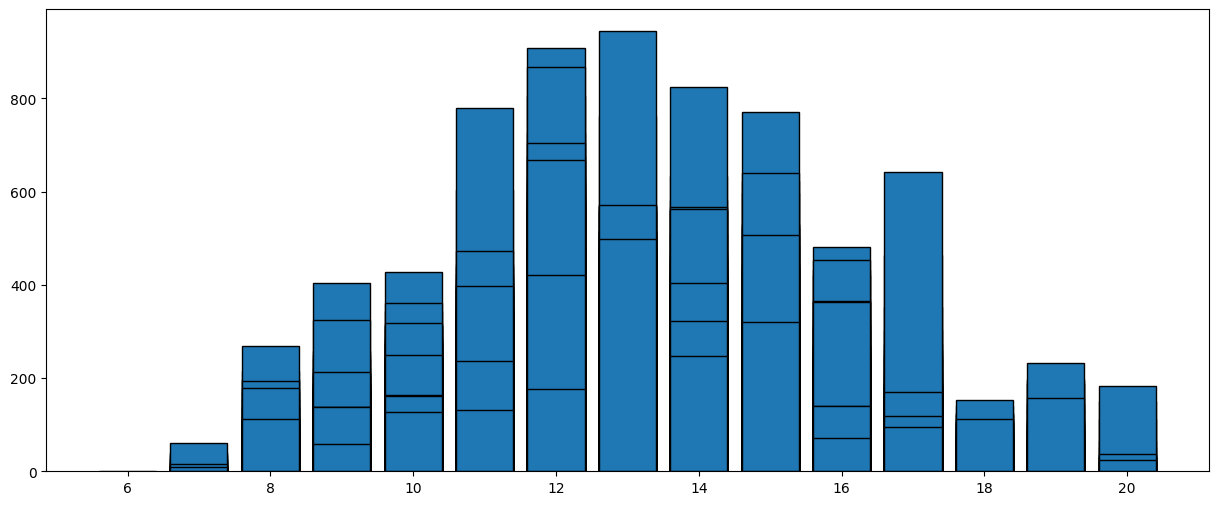

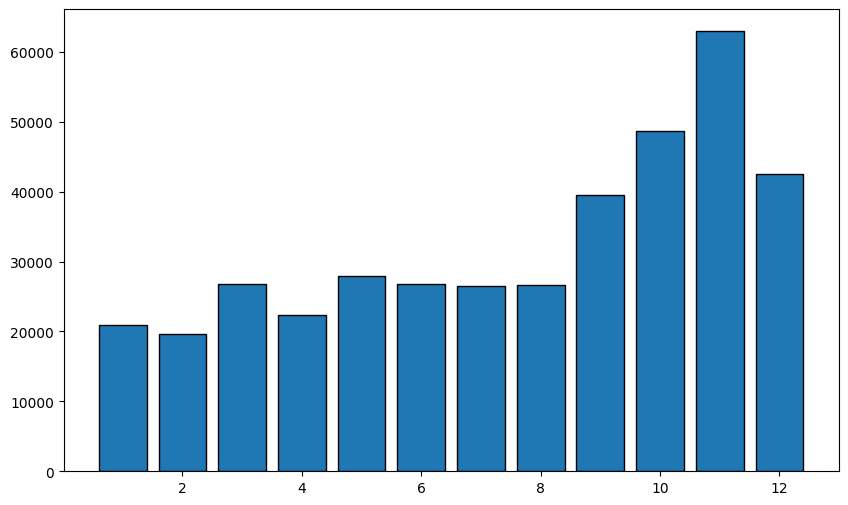

In [13]:
#Анализ количества заказов и общих продаж по странам
from scipy.stats import normaltest, shapiro

#Выделям нужные признаки на основе даты
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'],format='%Y-%m-%d %H:%M:%S')
data['Hour']=data['InvoiceDate'].dt.hour
data['Month']=data['InvoiceDate'].dt.month
data['Date']=data['InvoiceDate'].dt.date

#Группиуем по странам
data1=data.groupby(by=['Country','InvoiceNo'], as_index=False)['TotalPrice'].sum()
display(data1.groupby(by=['Country'],as_index=False)['TotalPrice'].count().sort_values(by='TotalPrice', ascending=False).head(5))
display(data1.groupby(by=['Country'],as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False).head(5))

hour_data=data.groupby(by=['Date','Hour'],as_index=False)['TotalPrice'].count()
hour_data.rename(columns={'TotalPrice': 'Count_hour'}, inplace=True)
#display(hour_data.groupby(by=['Hour'], as_index=False)['Count_hour'].mean())
#Визуализируем распределение
plt.figure(figsize=(15, 6))
plt.bar(hour_data['Hour'],hour_data['Count_hour'])

# Проводим тест Шапиро-Уилка
stat_shapiro, p_shapiro = shapiro(hour_data['Count_hour'])
print("Тест Шапиро-Уилка:")
print("Статистика теста:", stat_shapiro)
print("p-value:", p_shapiro)
if p_shapiro > 0.05:
    print("Распределение похоже на нормальное")
else:
    print("Распределение не является нормальным")

#Определение сезонности и месяев с максимальной выручкой
month_data=data.groupby(by=['Month'],as_index=False)['TotalPrice'].count()
#display(month_data)
plt.figure(figsize=(10, 6))
plt.bar(month_data['Month'],month_data['TotalPrice'])

#temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()

Чаще всего покупки делают клиенты их Британии, Германии и Франции.

Наибольшие продажи обеспечивают клиент из Британии, Нидерландов и Ирландии.

В данных выражена сезонноть, больше всего продаж в октябре, ноябре и декабре.

Чаще всего пкупки делают днем с 12 до 14 часов.

Распределение среднего количества ежедневно поступающих заказов по времени не является нормальным согласно тесту Шапиро Уилка, хотя визуально выглядит приближенным к нормальному.


### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [14]:

#Группируем по клиентам и применяем агрегирующие функции сразу к трем признакам
data_rfm=data.groupby(by=['CustomerID']).agg({'InvoiceNo': 'nunique', 'InvoiceDate': 'max','TotalPrice':'sum'}).reset_index()
#Считаем Recency
a=pd.to_datetime('2011-12-10 00:00:00',format='%Y-%m-%d %H:%M:%S')
data_rfm['InvoiceDate']=(a-data_rfm['InvoiceDate']).dt.total_seconds()/86400
#Переимпеновываем столбы
data_rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo':'Frequency','TotalPrice':'Monetary Value'}, inplace=True)
display(data_rfm.head(2))





,CustomerID,Frequency,Recency,Monetary Value
0,12346,1,325.582639,0.0
1,12347,7,2.338889,4310.0


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

'\nboxes = [px.box(df, x=column) for column in df.columns]\nfig = make_subplots(\n    rows=1, cols=3, \n    subplot_titles=(\n        "Recency","Frequency", "Monetary"\n    )\n)\n\nfor i, box in enumerate(boxes):\n    fig.add_trace(boxes[i][\'data\'][0], row=1, col=i+1)\n\nfig.update_layout(showlegend=True)\nfig.write_html(\'boxplot_1.html\')\nfig.show()'

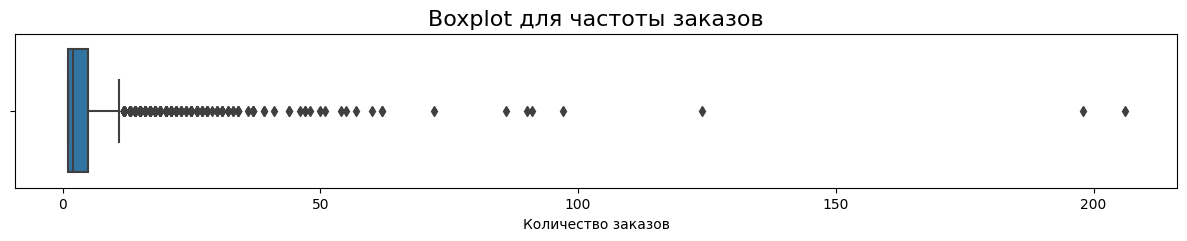

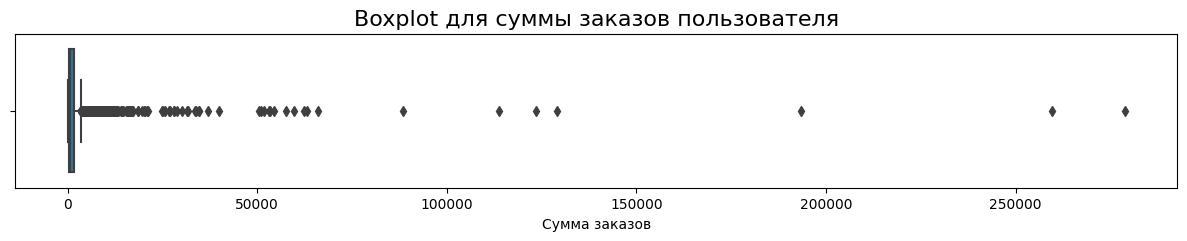

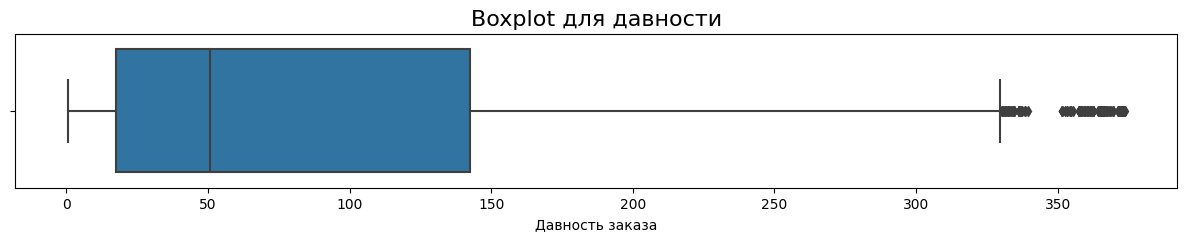

In [15]:
#Визуализируем каждый признак в виде коробчатых диаграм  
fig = plt.figure(figsize=(15, 2))
boxplot = sns.boxplot(data=data_rfm, x='Frequency')
boxplot.set_title('Boxplot для частоты заказов', fontsize=16)
boxplot.set_xlabel('Количество заказов')

fig = plt.figure(figsize=(15, 2))
boxplot = sns.boxplot(data=data_rfm, x='Monetary Value')
boxplot.set_title('Boxplot для суммы заказов пользователя', fontsize=16)
boxplot.set_xlabel('Сумма заказов')

fig = plt.figure(figsize=(15, 2))
boxplot = sns.boxplot(data=data_rfm, x='Recency')
boxplot.set_title('Boxplot для давности', fontsize=16)
boxplot.set_xlabel('Давность заказа')



"""
boxes = [px.box(df, x=column) for column in df.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
fig.write_html('boxplot_1.html')
fig.show()"""

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


Text(0.5, 0, 'Сумма заказов')

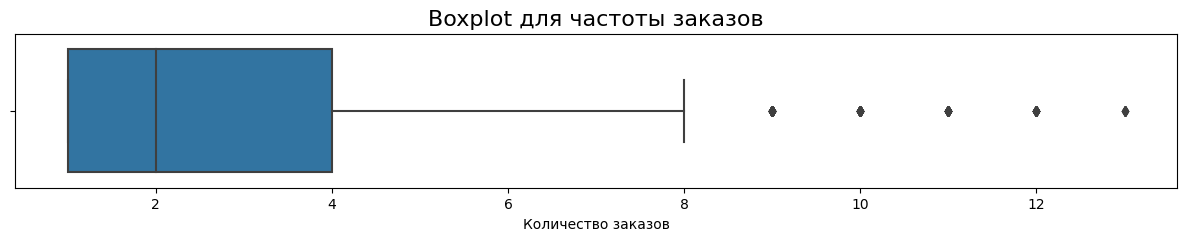

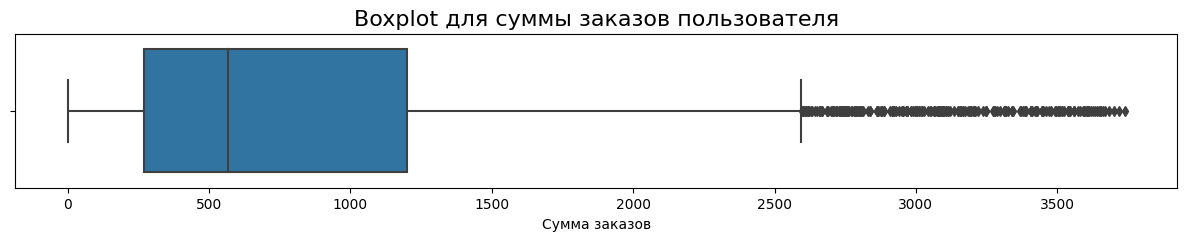

In [16]:
#Удаляем выборсы количества заказов
upper_threshold = data_rfm['Frequency'].quantile(0.95)
data_rfm=data_rfm[data_rfm['Frequency'] <= upper_threshold]

#Удаляем выбросы общей суммы заказов
upper_threshold = data_rfm['Monetary Value'].quantile(0.95)
data_rfm=data_rfm[data_rfm['Monetary Value'] <= upper_threshold]

#Строим заново коробочные диаграммы
fig = plt.figure(figsize=(15, 2))
boxplot = sns.boxplot(data=data_rfm, x='Frequency')
boxplot.set_title('Boxplot для частоты заказов', fontsize=16)
boxplot.set_xlabel('Количество заказов')

fig = plt.figure(figsize=(15, 2))
boxplot = sns.boxplot(data=data_rfm, x='Monetary Value')
boxplot.set_title('Boxplot для суммы заказов пользователя', fontsize=16)
boxplot.set_xlabel('Сумма заказов')




## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [17]:
# Создание Pipeline для стандартизации и нормализации
data_rfm=(data_rfm.reset_index(drop="True"))

pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Стандартизация
        ('normalizer', MinMaxScaler())  # Нормализация
])

# Применение Pipeline к данным
tf_data = pd.DataFrame(pipeline.fit_transform(data_rfm),columns=['CustomerID', 'Frequency','Recency','Monetary Value'])
tf_data=tf_data.drop('CustomerID',axis=1)


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

#Понижаем размерность методом PCA
pca2D = PCA(n_components=2)
pca_2D = pca2D.fit_transform(tf_data)
pca2D_df = pd.DataFrame(data = pca_2D, columns = ['x', 'y'])

#Создаем функции по кластеризации для каждого метода

def k_means_silh(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

def gm_silh(n_comp, X):
    gm_clustering = GaussianMixture(n_components=n_comp, random_state=42)
    # обучаем модель 
    gm_clustering.fit(X)
    # для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
    gm_prediction = gm_clustering.predict(X)
    silhouette1 = silhouette_score(X, gm_prediction)
    return silhouette1

def spectr_silh(cl_num, X):
    spectral_clustering = SpectralClustering(n_clusters=cl_num, random_state=42)
    spectral_clustering.fit(X)
    # получаем результаты кластеризации
    silhouette2= silhouette_score(X,spectral_clustering.labels_)
    return silhouette2

silhouette = 0
silhouette1 = 0
silhouette2 = 0

#Запускаем цикл перебора количества класторов и оцениваем три метода кластеризации
for clust_num in range(2, 10):
        d= k_means_silh(clust_num, pca2D_df)
        if silhouette< d:
                silhouette=d
                k=clust_num
        d1=gm_silh(clust_num, pca2D_df)
        if silhouette1< d1:
                silhouette1=d
                k1=clust_num
        d2=spectr_silh(clust_num, pca2D_df)
        if silhouette2< d2:
                silhouette2=d
                k2=clust_num


display('алгоритм k-means, оптимальное количество кластеров =', k, ' при коэф. силуэтта = ', silhouette)
display('алгоритм GMM, оптимальное количество кластеров =', k1, ' при коэф. силуэтта = ', silhouette1)
display('алгоритм Spectral, оптимальное количество кластеров =', k2, ' при коэф. силуэтта = ', silhouette2)

#Проводим кластеризацию данных методом, показавшим лучшие результаты
k_means =  KMeans(n_clusters=k, random_state=42)
k_means.fit(pca2D_df)
tf_data['Labels']=k_means.labels_




'алгоритм k-means, оптимальное количество кластеров ='

3

' при коэф. силуэтта = '

0.5337044669054745

'алгоритм GMM, оптимальное количество кластеров ='

2

' при коэф. силуэтта = '

0.47461705711310237

'алгоритм Spectral, оптимальное количество кластеров ='

3

' при коэф. силуэтта = '

0.5337044669054745

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

Text(0.5, 0, 'Frequency')

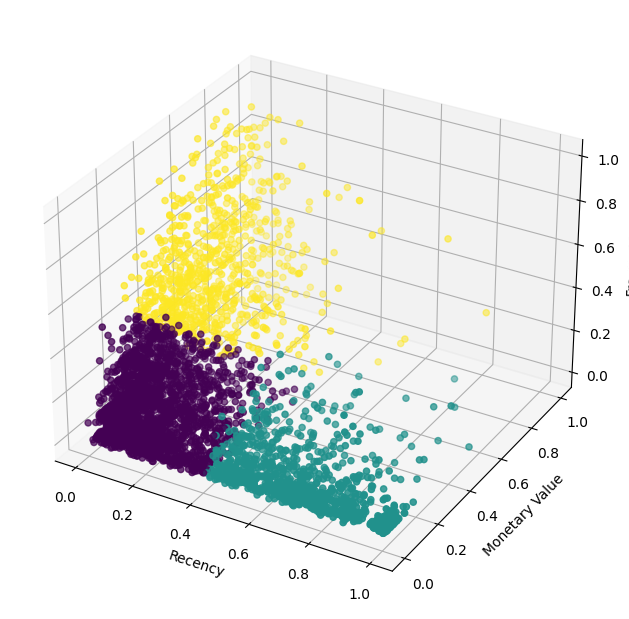

In [18]:
#Визуализируем получившиеся кластеры
from mpl_toolkits.mplot3d import Axes3D
tf_data=tf_data.rename(columns={'Monetary Value': 'Monetary'})
# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам

ax.scatter(xs=tf_data['Recency'], ys=tf_data['Monetary'], zs=tf_data['Frequency'], c=tf_data.Labels)
# добавим оси
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary Value')
ax.set_zlabel('Frequency')




Проанализировав диаграмму можно сделать выводы, о наличии трех кластеров:
 - кластер клиентов, которые давно, редко делали заказ, с низкой общей суммой покупок
 - кластер клиентов, которые недавно делали заказ с невысокой частотой и небольшой общей суммой покуплк
 - кластер клиентов, кто недавно делал заказ, делает их с большой частотой и с высокой общей суммой покупок. 

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [19]:
#группируем кластеры и выводим среднии значения признаков для каждого кластера
data_rfm['Cluster']=tf_data['Labels']
cl_g=data_rfm.groupby(by='Cluster').agg({'Frequency':'mean','Recency':'mean', 'Monetary Value':'mean'})
display(cl_g)


,Frequency,Recency,Monetary Value
Cluster,,,
0,2.196891,51.936353,590.529576
1,1.433433,254.116297,387.962272
2,6.330413,35.884011,2195.983542


In [20]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = MinMaxScaler()
    #scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [21]:
plot_cluster_profile(cl_g,3)

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

Выводы:

В рамках данного проекта решалась задача опредедления клиентов по сегментам для применения целевых марктеинговых мероприятий для каждого сегмента с целью повышения лояльности клиентов.

Получилось сегментировать клиентов по трем группам:
 - группа клиентов, которые давно, редко делали заказ, с низкой общей суммой покупок
 - группа клиентов, которые недавно делали заказ с невысокой частотой и небольшой общей суммой покуплк
 - группа клиентов, которые недавно делали заказ, делают их с большой частотой и с высокой общей суммой покупок. 

